# EDA

Realizamos un Exploratory Data Analysis (EDA) para conocer en profundidad los datos, y transformarlos de acuerdo a lo que se necesite para la implementación del modelo de machine learning

In [1]:
#Revisión general de los datos:
import ast
import pandas as pd

rows = []
with open("steam_games.json") as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df = pd.DataFrame(rows)

In [16]:
df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


In [3]:
#Resumen estadísitico de las columnas numéricas:
print(df.describe())

       discount_price
count      225.000000
mean        11.930533
std         17.492643
min          0.490000
25%          1.390000
50%          4.190000
75%         22.660000
max        139.990000


In [4]:
# Identificamos los valores faltantes en el DataFrame
missing_values = df.isnull().sum()
print(missing_values)

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64


In [5]:
# Elimina las filas con valores nulos en las columnas "app_name" y "id"
df_cleaned = df.dropna(subset=['app_name', 'id'])

# Verifica la cantidad de filas antes y después de la limpieza
print("Cantidad de filas antes de la limpieza:", len(df))
print("Cantidad de filas después de la limpieza:", len(df_cleaned))

Cantidad de filas antes de la limpieza: 32135
Cantidad de filas después de la limpieza: 32132


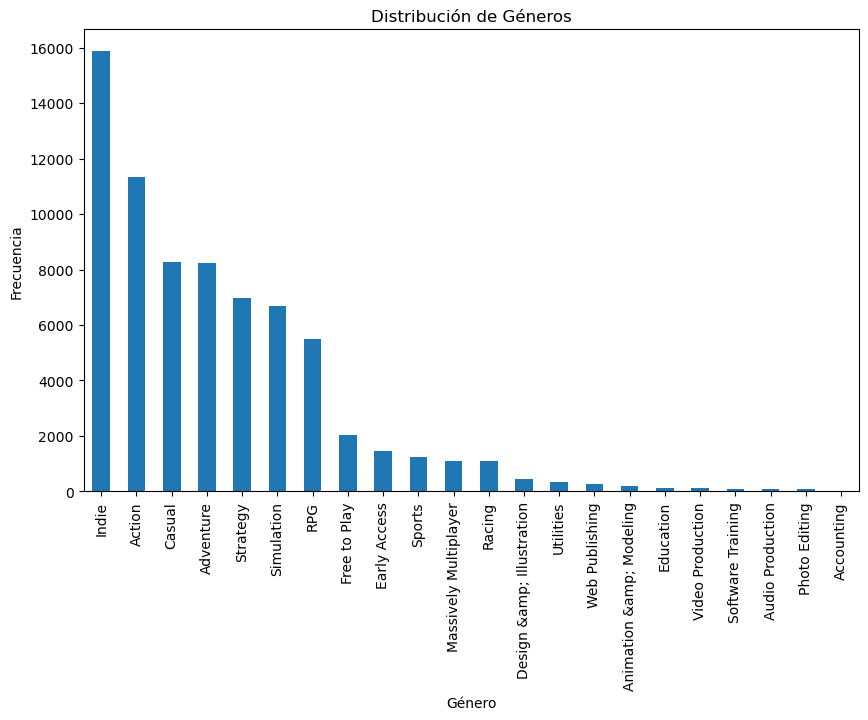

In [6]:
#Distribución de géneros
import matplotlib.pyplot as plt
# Convierte la lista de géneros en columnas individuales
df_genres = df['genres'].explode()

# Calcula la frecuencia de cada género
genre_counts = df_genres.value_counts()

# Visualiza la distribución de géneros con un gráfico de barras
genre_counts.plot(kind='bar', figsize=(10, 6), title='Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Ahora veremos los desarroladores más comunes:

In [19]:
import re
# Elimina filas con valores vacíos o nulos en la columna "Desarrollador"
df_cleaned = df.dropna(subset=['developer'])

# Filtra caracteres no válidos y nombres muy cortos (menos de 3 caracteres)
df_cleaned = df_cleaned[df_cleaned['developer'].apply(lambda x: bool(re.match(r'^[a-zA-Z\s]{3,}$', x)))]

# Convierte los nombres de desarrolladores a minúsculas para eliminar duplicados de casos diferentes
df_cleaned['developer'] = df_cleaned['developer'].str.lower()

# Crea un nuevo DataFrame con los nombres de desarrolladores y sus frecuencias
developer_counts = df_cleaned['developer'].value_counts()
tabla_frecuencias = pd.DataFrame({'Desarrollador': developer_counts.index, 'Frecuencia': developer_counts.values})

# Filtra solo los nombres de desarrolladores más comunes (por ejemplo, los 50 más comunes)
top_developers = tabla_frecuencias.head(50)

# Muestra la tabla de frecuencias actualizada
print(top_developers)

                 Desarrollador  Frecuencia
0               dovetail games         253
1   paradox development studio         156
2                       capcom         133
3                 ronimo games         123
4              choice of games         100
5              stainless games          97
6                      musopia          95
7             ubisoft montreal          86
8                 dl softworks          78
9                 scs software          74
10            arc system works          67
11               infinity ward          64
12                   rebellion          59
13                        sega          58
14                arcane raise          56
15                    treyarch          51
16               monster games          50
17              llama software          47
18                     ubisoft          46
19          boogygames studios          45
20                nihon falcom          43
21                sonnori corp          42
22         

Ahora veremos el Análisis de sentimientos y metascore:

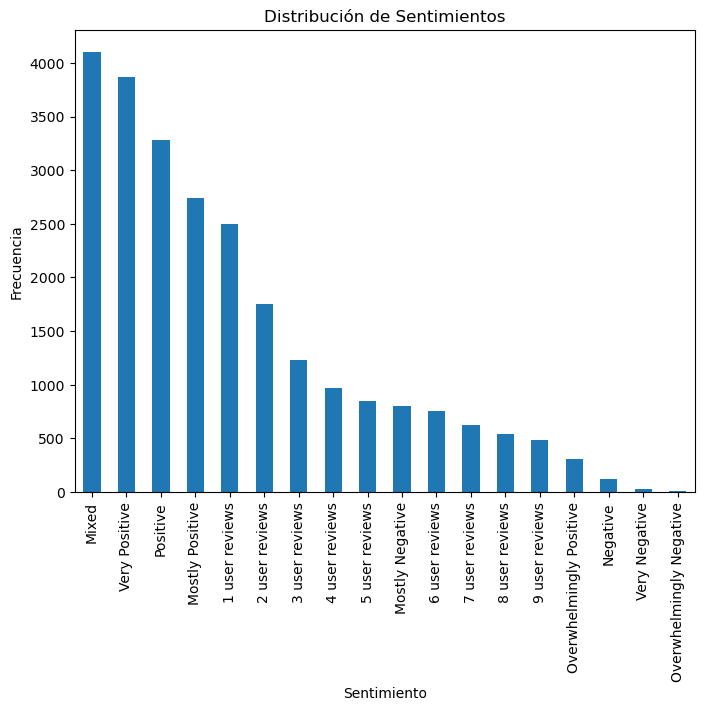

In [21]:
# Limpia la columna "sentiment" para obtener solo las etiquetas de sentimiento válidas
df['sentiment'] = df['sentiment'].apply(lambda x: x.strip("[]").split(",")[0].strip() if isinstance(x, str) else x)

# Elimina filas con valores nulos en la columna "sentiment"
df_cleaned = df.dropna(subset=['sentiment'])

# Cuenta la frecuencia de cada etiqueta de sentimiento
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Crea un gráfico de barras para visualizar la distribución de sentimientos
sentiment_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

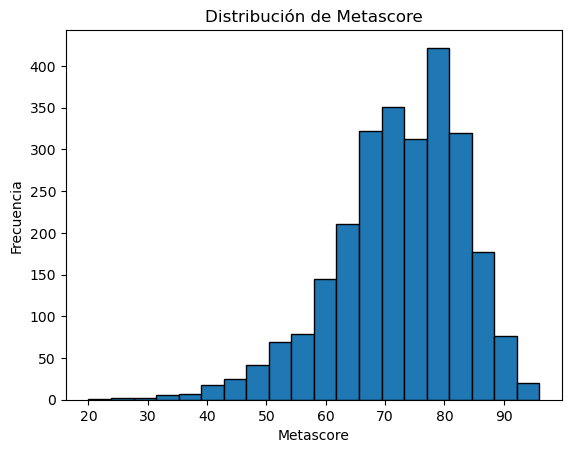

In [22]:
# Convierte la columna "metascore" a numérica
df['metascore'] = pd.to_numeric(df['metascore'], errors='coerce')

# Elimina filas con valores nulos en la columna "metascore"
df_cleaned = df.dropna(subset=['metascore'])

# Crea un histograma para visualizar la distribución de metascore
plt.hist(df_cleaned['metascore'], bins=20, edgecolor='k')
plt.title('Distribución de Metascore')
plt.xlabel('Metascore')
plt.ylabel('Frecuencia')
plt.show()

Ahora veremos las tendencias de lanzamientos a lo largo de los años

C:\Users\naomi\AppData\Local\Temp\ipykernel_1272\3522326851.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


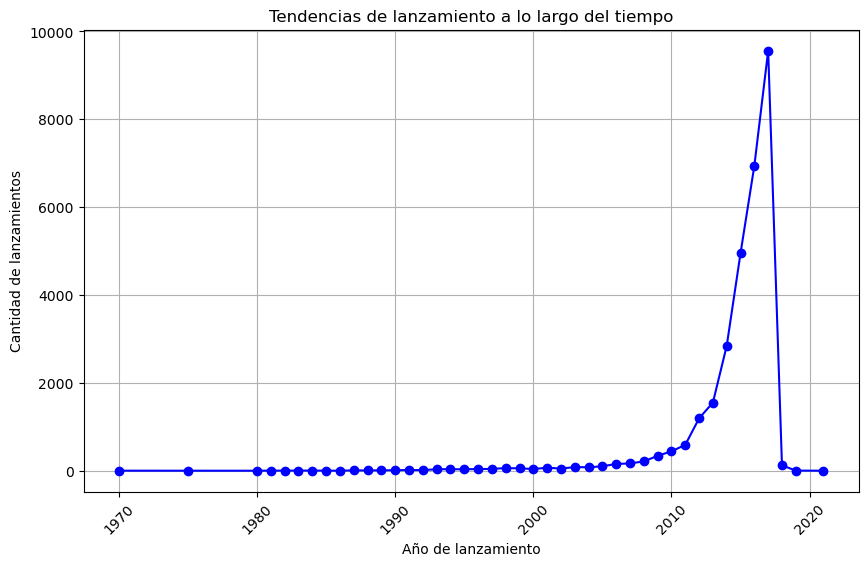

In [26]:
# Elimina los registros con valores no válidos en la columna "release_date"
df = df.dropna(subset=['release_date'])

# Convierte la columna "release_date" a formato de fecha, ignorando los valores "Soon.."
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Elimina los registros con fechas no válidas (por ejemplo, "Soon..")
df = df.dropna(subset=['release_date'])

# Extrae el año de lanzamiento de cada registro
df['year'] = df['release_date'].dt.year

# Cuenta la cantidad de lanzamientos por año
release_counts_by_year = df['year'].value_counts().sort_index()

# Visualiza los datos en un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(release_counts_by_year.index, release_counts_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de lanzamientos')
plt.title('Tendencias de lanzamiento a lo largo del tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Análisis de precios y descuentos:

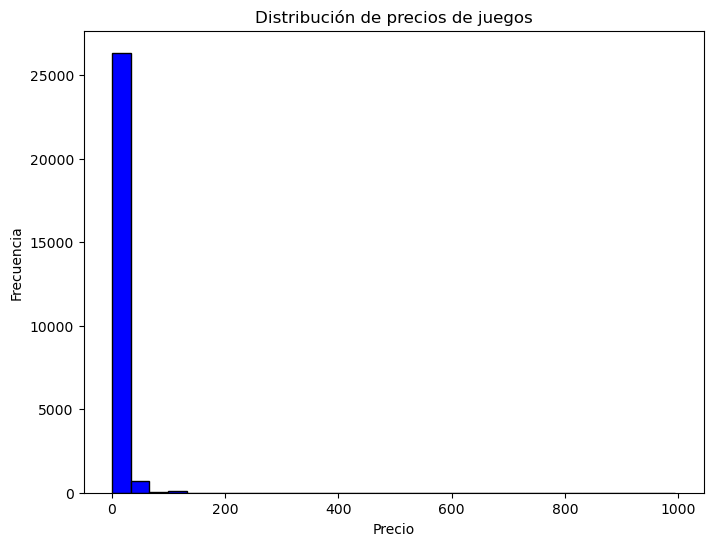

In [28]:
# Convertir la columna 'price' a valores numéricos
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Eliminar filas con valores no numéricos en la columna 'price'
df = df.dropna(subset=['price'])

# Histograma de precios
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de juegos')
plt.show()


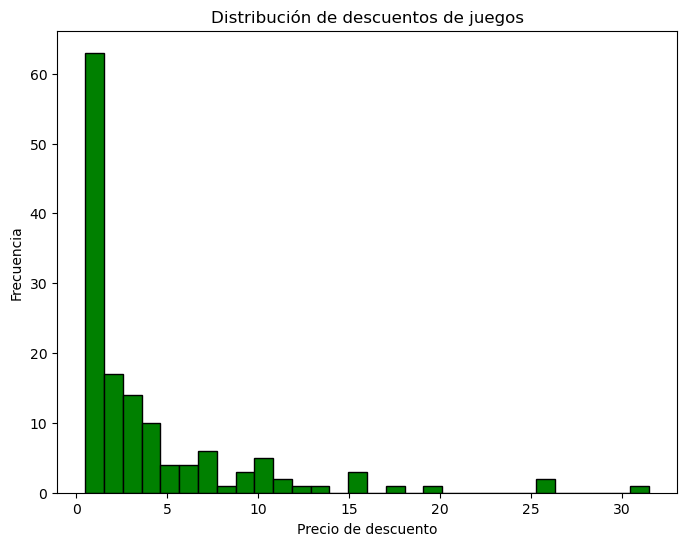

In [29]:
# Histograma de descuentos
plt.figure(figsize=(8, 6))
plt.hist(df['discount_price'], bins=30, color='green', edgecolor='black')
plt.xlabel('Precio de descuento')
plt.ylabel('Frecuencia')
plt.title('Distribución de descuentos de juegos')
plt.show()

In [30]:
# Estadísticas de precios y descuentos
price_stats = df['price'].describe()
discount_stats = df['discount_price'].describe()
print("Estadísticas de precios:")
print(price_stats)
print("\nEstadísticas de descuentos:")
print(discount_stats)

Estadísticas de precios:
count    27239.000000
mean         9.367288
std         16.462233
min          0.490000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Estadísticas de descuentos:
count    139.000000
mean       3.983597
std        5.284032
min        0.490000
25%        0.690000
50%        1.790000
75%        4.585000
max       31.490000
Name: discount_price, dtype: float64


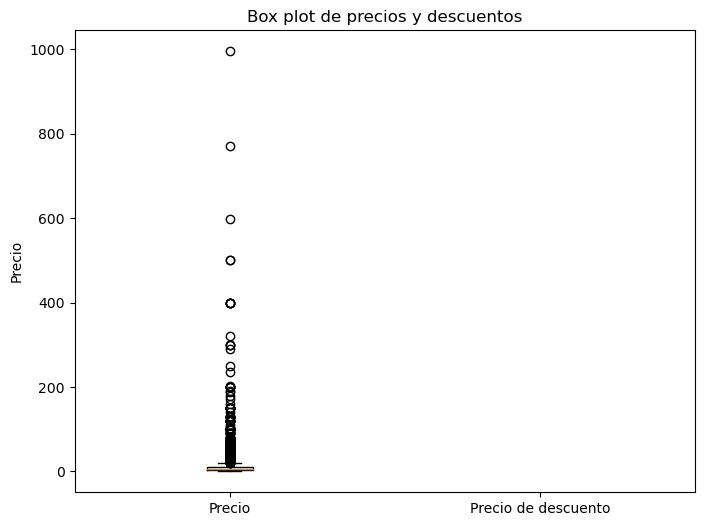

In [31]:
# Box plot de precios y descuentos
plt.figure(figsize=(8, 6))
plt.boxplot([df['price'], df['discount_price']], labels=['Precio', 'Precio de descuento'])
plt.ylabel('Precio')
plt.title('Box plot de precios y descuentos')
plt.show()

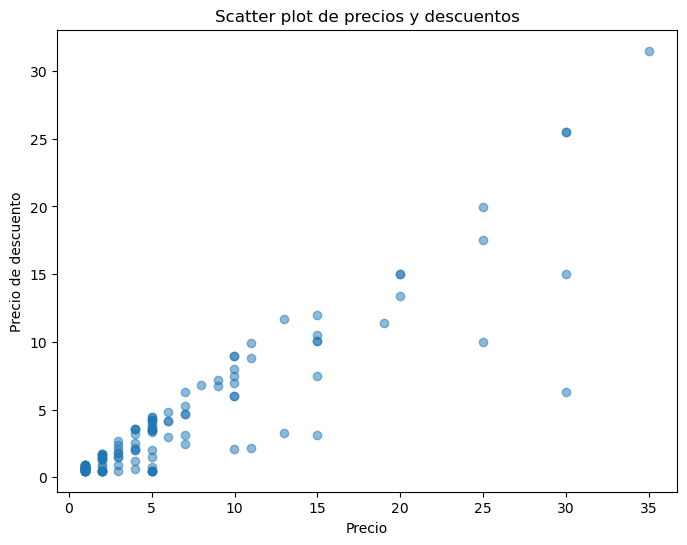

In [32]:
# Scatter plot de precios y descuentos
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['discount_price'], alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Precio de descuento')
plt.title('Scatter plot de precios y descuentos')
plt.show()

Análisis de etiquetas y especificaciones

## Etiquetas más comunes

In [37]:
# Filtrar las filas que no tienen valores faltantes en la columna 'tags'
df_filtered = df.dropna(subset=['tags'])

# Concatenar todas las listas de etiquetas en un solo conjunto
tags_set = set()
for tags_list in df_filtered['tags']:
    tags_set.update(tags_list)

# Calcular la frecuencia de cada etiqueta
tag_counts = {tag: sum(tag in tags_list for tags_list in df_filtered['tags']) for tag in tags_set}

# Crear un DataFrame para mostrar los resultados
tags_df = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
tags_df = tags_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las etiquetas más comunes
print(tags_df.head(10))

                  Tag  Frecuencia
147             Indie       14748
226            Action       10736
234         Adventure        8233
180            Casual        8185
323          Strategy        6670
132        Simulation        6579
195               RPG        5048
250      Singleplayer        3863
133  Great Soundtrack        2044
137            Puzzle        1905


## Especificaciones más comunes

In [38]:
# Filtrar las filas que no tienen valores faltantes en la columna 'specs'
df_filtered = df.dropna(subset=['specs'])

# Concatenar todas las listas de especificaciones en un solo conjunto
specs_set = set()
for specs_list in df_filtered['specs']:
    specs_set.update(specs_list)

# Calcular la frecuencia de cada especificación
specs_counts = {spec: sum(spec in specs_list for specs_list in df_filtered['specs']) for spec in specs_set}

# Crear un DataFrame para mostrar los resultados
specs_df = pd.DataFrame(list(specs_counts.items()), columns=['Especificación', 'Frecuencia'])

# Ordenar el DataFrame por frecuencia descendente
specs_df = specs_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar las especificaciones más comunes
print(specs_df.head(10))

                Especificación  Frecuencia
22               Single-player       23537
15          Steam Achievements       14543
2         Downloadable Content       11712
25         Steam Trading Cards       11146
26                 Steam Cloud        9149
12                Multi-player        7192
7      Full controller support        6544
27  Partial Controller Support        5869
10          Steam Leaderboards        5495
6                        Co-op        3833


Análisis de acceso temprano

In [39]:
# Contar la cantidad de juegos con acceso temprano (True) y sin acceso temprano (False)
early_access_counts = df['early_access'].value_counts()

# Calcular la proporción de juegos con acceso temprano
prop_early_access = early_access_counts[True] / len(df) * 100

# Mostrar los resultados
print("Cantidad de juegos con acceso temprano:", early_access_counts[True])
print("Cantidad de juegos sin acceso temprano:", early_access_counts[False])
print("Proporción de juegos con acceso temprano (%):", prop_early_access)

Cantidad de juegos con acceso temprano: 1268
Cantidad de juegos sin acceso temprano: 25971
Proporción de juegos con acceso temprano (%): 4.6550901281251145


Tras realizar un exhaustivo análisis, se puede deducir la presencia de una considerable cantidad de datos anidados, lo cual demandará la aplicación de diversas transformaciones, entre las que se incluye el hot-end coding y otras técnicas, para asegurar el óptimo desempeño del modelo de regresión lineal múltiple.